In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Информация о продажах за 12 месяцев

In [2]:
data = {
    'Сушеный кальмар': np.random.normal(190, 4, 12),
    'Вяленый кальмар': np.random.normal(190, 5, 12),
    'Селедка': np.random.normal(188, 3, 12),
    'Пиво': np.random.normal(133, 5, 12),
    'Сухарики': np.random.normal(111, 35, 12),
    'Чипсы': np.random.normal(111, 40, 12),
    'Водка': np.random.normal(144, 8, 12),
    'Сигареты': np.random.normal(166, 11, 12),
    'Виски': np.random.normal(177, 3, 12),
    'Ром': np.random.normal(111, 16, 12),
}

In [3]:
df = pd.DataFrame(data)
df

,Сушеный кальмар,Вяленый кальмар,Селедка,Пиво,Сухарики,Чипсы,Водка,Сигареты,Виски,Ром
0,186.300929,193.362182,187.319873,122.745054,105.098508,50.369142,137.422456,151.856827,175.330397,94.921659
1,189.110015,188.669715,182.856752,139.533085,67.112086,106.460248,146.946792,171.683786,178.901241,102.402816
2,186.475017,187.575813,184.282767,122.354394,128.186119,131.305779,146.683029,177.538850,185.066702,129.535335
3,187.670357,190.441440,187.286318,127.547523,187.086279,128.480450,148.354214,167.178498,176.313425,104.854637
4,190.124374,196.285643,182.262370,127.998534,146.581777,117.636711,140.491348,150.314123,184.980763,146.923611
5,190.130943,185.793807,182.091626,137.570762,55.918319,85.918569,134.122406,159.026864,181.116073,109.704645
6,197.264878,184.798722,187.739398,131.863185,94.298470,103.396332,155.987016,179.355583,175.719338,96.406407
7,186.846894,187.389566,187.874471,133.800104,65.714120,145.221156,157.388006,174.178099,177.215695,103.009796
8,189.370849,201.636011,188.011447,133.159201,73.686513,101.232000,144.809666,158.912740,176.122398,108.940809
9,191.036625,195.620874,184.045346,135.956551,6.174320,69.258406,155.589561,169.691700,177.319164,123.427707


## Обработка данных

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

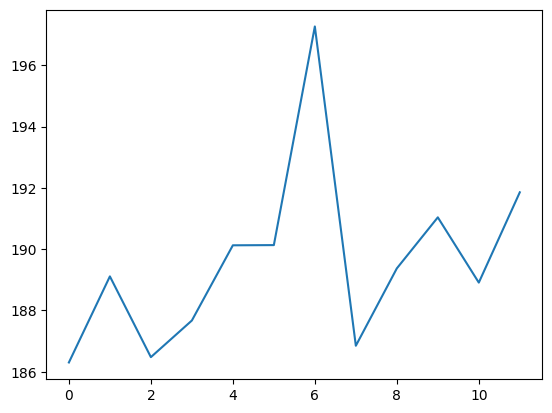

In [4]:
ax = sns.lineplot(df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [5]:
p0 = df.sum() / df.shape[0]
p0

Сушеный кальмар    189.591039
Вяленый кальмар    191.076364
Селедка            184.922816
Пиво               131.755382
Сухарики           108.349148
Чипсы              106.165969
Водка              144.938694
Сигареты           165.906306
Виски              178.399137
Ром                110.993399
dtype: float64

In [13]:
std = ((df - p0) ** 2).sum() / (df.shape[0] - 1)
std = std ** (1 / 2)
std

Сушеный кальмар     3.002659
Вяленый кальмар     5.284587
Селедка             2.508850
Пиво                5.513270
Сухарики           59.829138
Чипсы              27.798075
Водка               9.087451
Сигареты            9.735382
Виски               3.546933
Ром                15.713276
dtype: float64

In [7]:
x_extrapol = p0 + np.random.normal(0, std, len(p0))
pd.concat([df, pd.DataFrame([x_extrapol], columns=x_extrapol.index)]).reset_index(drop=True)

,Сушеный кальмар,Вяленый кальмар,Селедка,Пиво,Сухарики,Чипсы,Водка,Сигареты,Виски,Ром
0,186.300929,193.362182,187.319873,122.745054,105.098508,50.369142,137.422456,151.856827,175.330397,94.921659
1,189.110015,188.669715,182.856752,139.533085,67.112086,106.460248,146.946792,171.683786,178.901241,102.402816
2,186.475017,187.575813,184.282767,122.354394,128.186119,131.305779,146.683029,177.538850,185.066702,129.535335
3,187.670357,190.441440,187.286318,127.547523,187.086279,128.480450,148.354214,167.178498,176.313425,104.854637
4,190.124374,196.285643,182.262370,127.998534,146.581777,117.636711,140.491348,150.314123,184.980763,146.923611
5,190.130943,185.793807,182.091626,137.570762,55.918319,85.918569,134.122406,159.026864,181.116073,109.704645
6,197.264878,184.798722,187.739398,131.863185,94.298470,103.396332,155.987016,179.355583,175.719338,96.406407
7,186.846894,187.389566,187.874471,133.800104,65.714120,145.221156,157.388006,174.178099,177.215695,103.009796
8,189.370849,201.636011,188.011447,133.159201,73.686513,101.232000,144.809666,158.912740,176.122398,108.940809
9,191.036625,195.620874,184.045346,135.956551,6.174320,69.258406,155.589561,169.691700,177.319164,123.427707


## Оценки

In [8]:
reliability = std / p0
reliability

Сушеный кальмар    0.015838
Вяленый кальмар    0.027657
Селедка            0.013567
Пиво               0.041845
Сухарики           0.552188
Чипсы              0.261836
Водка              0.062699
Сигареты           0.058680
Виски              0.019882
Ром                0.141569
dtype: float64

### Уловие 1 $ X_i - \hat{p_0} < 2\hat{\sigma}: \forall i$

In [9]:
cond1 = ((df - p0) < 2 * std).all()
cond1

Сушеный кальмар    False
Вяленый кальмар     True
Селедка             True
Пиво                True
Сухарики            True
Чипсы               True
Водка               True
Сигареты            True
Виски               True
Ром                False
dtype: bool

### Условие 2 $ \hat{p_0} > 2\hat{\sigma} $

In [10]:
cond2 = p0 > 2 * std
cond2

Сушеный кальмар     True
Вяленый кальмар     True
Селедка             True
Пиво                True
Сухарики           False
Чипсы               True
Водка               True
Сигареты            True
Виски               True
Ром                 True
dtype: bool

### Условие 3 $ X_i > 0: \forall i $

In [11]:
cond3 = (df > 0).all()
cond3

Сушеный кальмар    True
Вяленый кальмар    True
Селедка            True
Пиво               True
Сухарики           True
Чипсы              True
Водка              True
Сигареты           True
Виски              True
Ром                True
dtype: bool

### Цветовая классификация

In [12]:
product_color = pd.Series(dtype='string')
for name in df.columns:
    if (not cond3[name]):
        product_color[name] = 'Красный'
    elif (not cond1[name] and not cond2[name]):
        product_color[name] = 'Оранжевый'
    elif (not cond1[name] or not cond2[name]):
        product_color[name] = 'Желтый'
    else:
        product_color[name] = 'Зеленый'
product_color

Сушеный кальмар     Желтый
Вяленый кальмар    Зеленый
Селедка            Зеленый
Пиво               Зеленый
Сухарики            Желтый
Чипсы              Зеленый
Водка              Зеленый
Сигареты           Зеленый
Виски              Зеленый
Ром                 Желтый
dtype: object